In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import etree
import os

/var/folders/bc/71b26x1d0ld2w0vd11w1yndr0000gn/T/ipykernel_74131/2461742845.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to parse XML and convert to DataFrame
def parse_xml_to_df(xml_file, desired_tags):
    tree = etree.parse(xml_file)
    root = tree.getroot()
    all_records = []
    for child in root:
        record = {}
        for tag in desired_tags:
            record[tag] = child.get(tag)
        all_records.append(record)
    return pd.DataFrame(all_records)

In [11]:
posts_file_path = 'Posts.xml'
post_tags = ['Id', 'ViewCount', 'Body','PostTypeId', 'Title', 'AnswerCount', 'CommentCount', 'FavoriteCount','Score','CreationDate','Tags','Count']
posts_df = parse_xml_to_df(posts_file_path, post_tags)

In [12]:
tags_file_path = 'Tags.xml'
tags_tags = ['Id', 'TagName', 'Count','ExcerptPostId', 'WikiPostId']
tags_df = parse_xml_to_df(tags_file_path, tags_tags)

In [13]:
votes_file_path = 'Votes.xml'
votes_tags = ['Id', 'PostId', 'VoteTypeId', 'CreationDate', 'UserId', 'BountyAmount']
votes_df = parse_xml_to_df(votes_file_path, votes_tags)

In [14]:
posts_history_file_path = 'PostHistory.xml'
post_history_tags = ['Id', 'PostHistoryTypeId','PostId','RevisionGUID','CreationDate','UserId','Text','Comment','ContentLicense']
posts_history_df = parse_xml_to_df(posts_history_file_path, post_history_tags)

In [15]:
comments_file_path = 'Comments.xml'
comments_tags = ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId']
comments_ds = parse_xml_to_df(comments_file_path, comments_tags)

In [8]:
users_file_path = 'Users.xml'
users_tags = ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId']
users_df = parse_xml_to_df(users_file_path, users_tags)

<Axes: title={'center': 'Number of Posts Over Time'}, xlabel='YearMonth'>

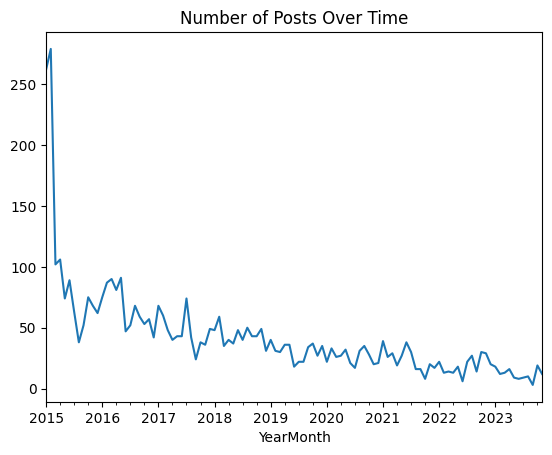

In [9]:
# Convert 'CreationDate' to datetime format
posts_df['CreationDate'] = pd.to_datetime(posts_df['CreationDate'])

# Extract year and month from 'CreationDate'
posts_df['YearMonth'] = posts_df['CreationDate'].dt.to_period('M')

# Group by YearMonth and count the number of posts
posts_over_time = posts_df.groupby('YearMonth').size()

# Plot the data
posts_over_time.plot(kind='line', title='Number of Posts Over Time')

/var/folders/bc/71b26x1d0ld2w0vd11w1yndr0000gn/T/ipykernel_74131/2370416396.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='TagName', data=top_tags, palette='viridis')


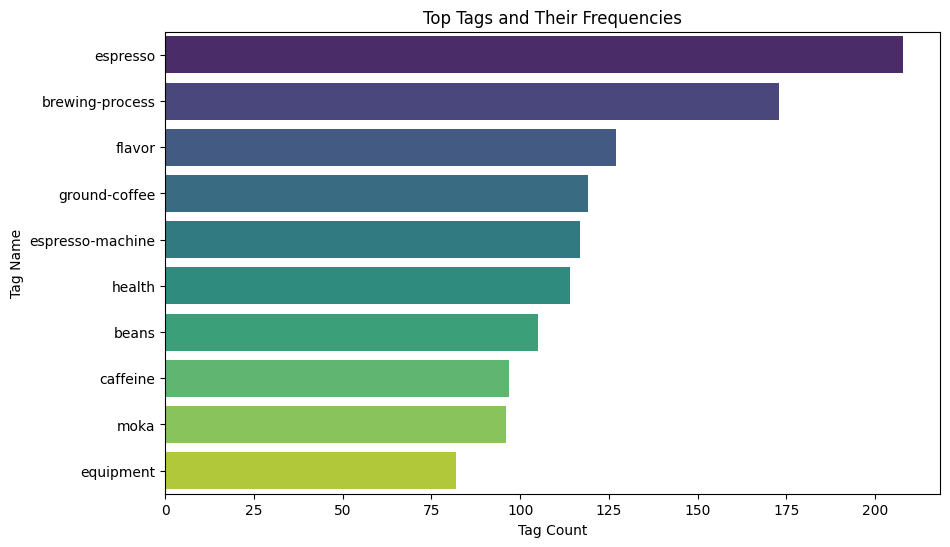

In [16]:
# Convert 'Count' column to numeric, coerce errors to NaN
tags_df['Count'] = pd.to_numeric(tags_df['Count'], errors='coerce')

# Drop rows with NaN values in 'Count' column
tags_df.dropna(subset=['Count'], inplace=True)

# Get the top tags and their frequencies
top_tags = tags_df.nlargest(10, 'Count')[['TagName', 'Count']]

# Plot bar chart for top tags
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='TagName', data=top_tags, palette='viridis')
plt.title('Top Tags and Their Frequencies')
plt.xlabel('Tag Count')
plt.ylabel('Tag Name')
plt.show()

/var/folders/bc/71b26x1d0ld2w0vd11w1yndr0000gn/T/ipykernel_74131/627056373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PostTypeId', data=merged_posts_history, palette='Set2')


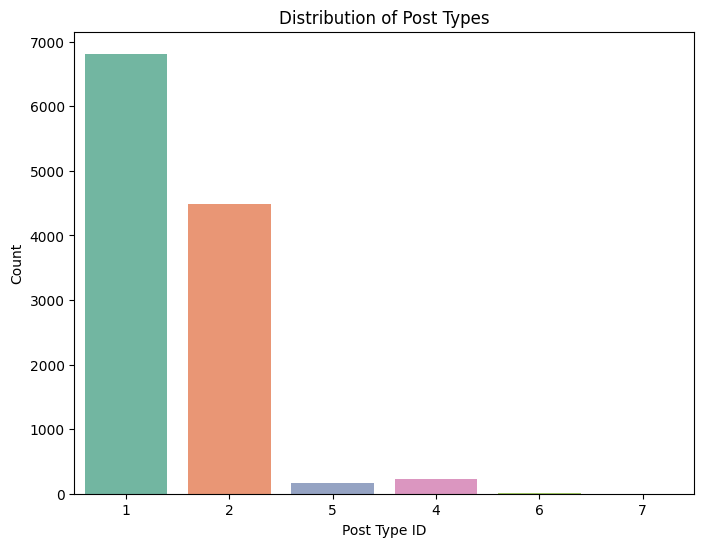

In [17]:
# Merge Posts and PostHistory DataFrames
merged_posts_history = pd.merge(posts_df, posts_history_df, left_on='Id', right_on='PostId', how='inner')

# Plot a countplot for PostTypeId
plt.figure(figsize=(8, 6))
sns.countplot(x='PostTypeId', data=merged_posts_history, palette='Set2')
plt.title('Distribution of Post Types')
plt.xlabel('Post Type ID')
plt.ylabel('Count')
plt.show()

In [21]:
merged_posts_history.head()

,Id_x,ViewCount,Body,PostTypeId,Title,AnswerCount,CommentCount,FavoriteCount,Score,CreationDate_x,...,Count,Id_y,PostHistoryTypeId,PostId,RevisionGUID,CreationDate_y,UserId,Text,Comment,ContentLicense
0,1,3016,"<p>I just got a pound of microroasted, local c...",1,How should I store whole bean coffee?,7,4,None,49,2015-01-27T20:09:32.720,...,None,1,2,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27T20:09:32.720,4,"I just got a pound of microroasted, local coff...",None,CC BY-SA 3.0
1,1,3016,"<p>I just got a pound of microroasted, local c...",1,How should I store whole bean coffee?,7,4,None,49,2015-01-27T20:09:32.720,...,None,2,1,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27T20:09:32.720,4,How should I store whole bean coffee?,None,CC BY-SA 3.0
2,1,3016,"<p>I just got a pound of microroasted, local c...",1,How should I store whole bean coffee?,7,4,None,49,2015-01-27T20:09:32.720,...,None,3,3,1,689cb04a-8d2a-4fcb-b125-bce8b7012b88,2015-01-27T20:09:32.720,4,<storage><whole-bean>,None,CC BY-SA 3.0
3,2,1163,<p>I manually grind coffee beans for drip coff...,1,How fine should I grind coffee for drip/pour o...,2,4,None,7,2015-01-27T20:13:58.610,...,None,4,2,2,eee3664d-2c4f-432c-bce9-3fdfaf59fe94,2015-01-27T20:13:58.610,8,I manually grind coffee beans for drip coffee ...,None,CC BY-SA 3.0
4,2,1163,<p>I manually grind coffee beans for drip coff...,1,How fine should I grind coffee for drip/pour o...,2,4,None,7,2015-01-27T20:13:58.610,...,None,5,1,2,eee3664d-2c4f-432c-bce9-3fdfaf59fe94,2015-01-27T20:13:58.610,8,How fine should I grind coffee for drip coffee,None,CC BY-SA 3.0


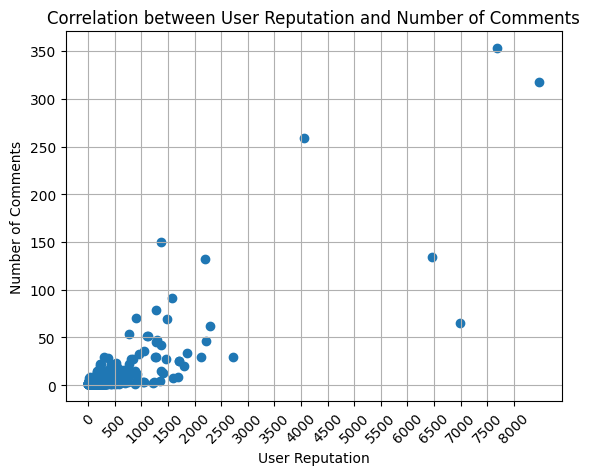

Correlation between user reputation and number of comments: 0.3333581073502236


In [20]:
comments_count = comments_ds['UserId'].value_counts().reset_index()
comments_count.columns = ['UserId', 'CommentCount']
comments_count['UserId'] = comments_count['UserId'].apply(pd.to_numeric, errors='coerce')
users_df['Id'] = users_df['Id'].apply(pd.to_numeric, errors='coerce')
users_df['Reputation'] = users_df['Reputation'].apply(pd.to_numeric, errors='coerce')
merged_df = pd.merge(users_df, comments_count, left_on='Id', right_on='UserId', how='inner')

correlation = merged_df['Reputation'].corr(merged_df['CommentCount'])

Q1 = merged_df['Reputation'].quantile(0.25)
Q3 = merged_df['Reputation'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = merged_df[(merged_df['Reputation'] >= Q1 - 1.5 * IQR) & (merged_df['Reputation'] <= Q3 + 1.5 * IQR)]

correlation = filtered_df['Reputation'].corr(filtered_df['CommentCount'])

plt.scatter(merged_df['Reputation'], merged_df['CommentCount'])
plt.title('Correlation between User Reputation and Number of Comments')
plt.xlabel('User Reputation')
plt.ylabel('Number of Comments')
plt.grid(True)

# Display fewer points on the x-axis
plt.xticks(ticks=range(0, max(merged_df['Reputation']), 500), rotation=45)

plt.show()

print(f'Correlation between user reputation and number of comments: {correlation}')
